In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv('boston_marathon_2013.csv')
df = df.drop_duplicates()

df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [3]:
#examining the columns of df
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [4]:
#initial exploration of df using describe method
df.describe()

,age,division,official,overall,pace,genderdiv
count,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000
mean,41.643374,1101.441852,208.192250,8433.023272,7.948645,4353.567927
std,10.350718,942.042590,23.696453,5050.073585,0.903952,2771.521698
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,364.000000,191.750000,4067.000000,7.320000,2036.000000
50%,42.000000,843.000000,209.230000,8251.000000,7.980000,4115.000000
75%,49.000000,1560.000000,225.230000,12664.000000,8.600000,6317.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [5]:
#examining column types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 0 to 16163
Data columns (total 21 columns):
25k          16157 non-null object
age          16157 non-null int64
name         16157 non-null object
division     16157 non-null int64
10k          16157 non-null object
gender       16157 non-null object
half         16157 non-null object
official     16157 non-null float64
bib          16157 non-null object
ctz          757 non-null object
country      16157 non-null object
overall      16157 non-null int64
pace         16157 non-null float64
state        14701 non-null object
30k          16157 non-null object
5k           16157 non-null object
genderdiv    16157 non-null int64
20k          16157 non-null object
35k          16157 non-null object
city         16156 non-null object
40k          16157 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.7+ MB


In [6]:
#exploring the gender column
df.gender.value_counts()

M    9673
F    6484
Name: gender, dtype: int64

In [7]:
#examining the dtype for the "gender" column.
print(df['gender'].dtype)

object


In [8]:
#encoding the gender column to numerical values using map()
df['gender'] = df["gender"].map({'M':1, "F":0})

In [9]:
print(df['gender'].dtype)

int64


In [10]:
#dropping unnecessary columns
X = df.drop(['name', 'ctz', 'country', 'state', 'city', 'bib'], 1)

#y = df['overall']

In [11]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 0 to 16163
Data columns (total 15 columns):
25k          16157 non-null object
age          16157 non-null int64
division     16157 non-null int64
10k          16157 non-null object
gender       16157 non-null int64
half         16157 non-null object
official     16157 non-null float64
overall      16157 non-null int64
pace         16157 non-null float64
30k          16157 non-null object
5k           16157 non-null object
genderdiv    16157 non-null int64
20k          16157 non-null object
35k          16157 non-null object
40k          16157 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 2.0+ MB


In [13]:
#converting the string columns into numeric and filling the nans using ffill.
X['25k'] = pd.to_numeric(X['25k'], errors='coerce')
X['25k'].ffill(axis=0, inplace=True)

X['10k'] = pd.to_numeric(X['10k'], errors='coerce')
X['10k'].ffill(axis=0, inplace=True)

X['half'] = pd.to_numeric(X['half'], errors='coerce')
X['half'].ffill(axis=0, inplace=True)

X['30k'] = pd.to_numeric(X['30k'], errors='coerce')
X['30k'].ffill(axis=0, inplace=True)

X['5k'] = pd.to_numeric(X['5k'], errors='coerce')
X['5k'].ffill(axis=0, inplace=True)

X['20k'] = pd.to_numeric(X['20k'], errors='coerce')
X['20k'].ffill(axis=0, inplace=True)

X['35k'] = pd.to_numeric(X['35k'], errors='coerce')
X['35k'].ffill(axis=0, inplace=True)

X['40k'] = pd.to_numeric(X['40k'], errors='coerce')
X['40k'].ffill(axis=0, inplace=True)





In [14]:
X.isnull().sum().sum()

0

In [15]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)


### Kmeans

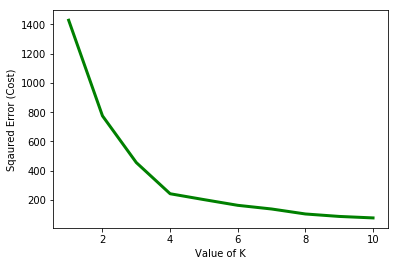

In [16]:
#using the elbow method to get the optimum value for K
cost =[] 
for i in range(1, 11): 
    KM_test = KMeans(n_clusters = i, max_iter = 500) 
    KM_test.fit(X_norm) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM_test.inertia_)    
    
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

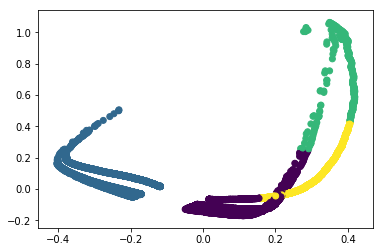

In [17]:
#initializing Kmeans and predicting cluster value for each data point
km = KMeans(n_clusters=4, init='k-means++')
km.fit(X_norm)

labels_pred_km = km.predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred_km)
plt.show()


In [18]:
#extracting the cluster labels from kmeans and assigning it to variable cluster_labels_km
cluster_labels_km = km.labels_

In [19]:
#extracting the cluster centers from kmeans
km.cluster_centers_

array([[1.64266579e-02, 7.01427298e-03, 7.84887569e-02, 6.51554707e-03,
        1.48085525e-04, 1.38103427e-02, 2.87900645e-02, 7.82774704e-01,
        1.09924763e-03, 1.99143891e-02, 3.26794213e-03, 6.06334339e-01,
        1.30915145e-02, 2.35281124e-02, 2.71791325e-02],
       [1.35532804e-02, 4.10882162e-03, 1.02684908e-01, 5.37521979e-03,
        2.22261445e-18, 1.13901972e-02, 2.35726859e-02, 9.51282229e-01,
        8.99993323e-04, 1.64230489e-02, 2.69885017e-03, 2.60740336e-01,
        1.07977243e-02, 1.93738752e-02, 2.22977291e-02],
       [2.32802237e-01, 9.18155368e-02, 2.06354143e-01, 9.17534832e-02,
        2.74067031e-03, 1.95809147e-01, 4.04864533e-01, 3.35252233e-01,
        1.54623812e-02, 2.82186082e-01, 4.57119208e-02, 3.05747808e-01,
        1.85759332e-01, 3.32937572e-01, 3.82197993e-01],
       [4.01032108e-02, 1.24300416e-02, 4.14887509e-01, 1.59699987e-02,
        3.98158575e-04, 3.37687277e-02, 6.97351963e-02, 6.57187513e-01,
        2.66291424e-03, 4.84737730e-0

In [20]:
#extracting kmeans inertia value
km.inertia_

242.71123918855693

### Spectral Clustering

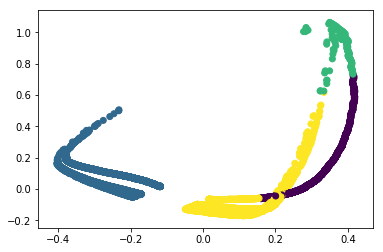

In [21]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_norm)

#Predicted clusters.
sc_labels = sc.fit_predict(X_norm)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sc_labels)
plt.show()

#print('Comparing the assigned categories to the ones in the data:')
#print(pd.crosstab(y_train,predict))

### Mean shift

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

MS_predict_labels = ms.fit_predict(X_norm)

# Extract cluster assignments for each data point and assign it to variable ms_labels
ms_labels = ms.labels_

# Count our clusters.
n_clusters_ms = len(np.unique(ms_labels))

print("Number of estimated clusters: {}".format(n_clusters_ms))

Number of estimated clusters: 4


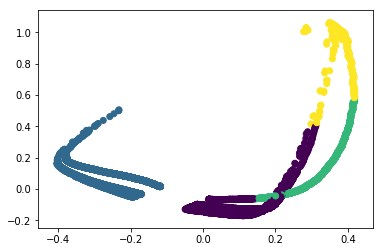

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=MS_predict_labels)
plt.show()

In [24]:
# Extract cluster assignments from mean shift for each data point and assign it to variable ms_labels
ms_labels = ms.labels_


In [25]:
# Coordinates of the cluster centers for mean shift
cluster_centers_ms = ms.cluster_centers_

In [26]:
#creating a new column for dataframe X, containing cluster labels for each observation (datapoint) from Kmeans results.
X['ClusterNum'] = labels_pred_km

In [27]:
X.head()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,ClusterNum
0,49.87,28,9,18.18,1,40.93,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55,2
1,77.27,30,5,30.90,1,64.90,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77,2
2,77.23,23,1,30.90,1,64.92,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78,2
3,50.50,32,5,18.73,1,42.00,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43,2
4,48.75,39,3,18.18,1,40.57,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88,2


In [28]:
#examining ClusterName column
X.ClusterNum.value_counts()

0    6613
1    6475
3    2708
2     361
Name: ClusterNum, dtype: int64

In [29]:
#using pd.crosstab to compare gender with cluster assignment
print('Comparing clusters against gender:')
print(pd.crosstab(X['ClusterNum'], X['gender']))

Comparing the assigned clusters to the ones in the data:
gender         0     1
ClusterNum            
0              0  6613
1           6475     0
2              9   352
3              0  2708


In [30]:
dfX_cluster0 = X[X['ClusterNum'] == 0]
dfX_cluster1 = X[X['ClusterNum'] == 1]
dfX_cluster2 = X[X['ClusterNum'] == 2]
dfX_cluster3 = X[X['ClusterNum'] == 3]

Text(0.5, 0, 'Age')

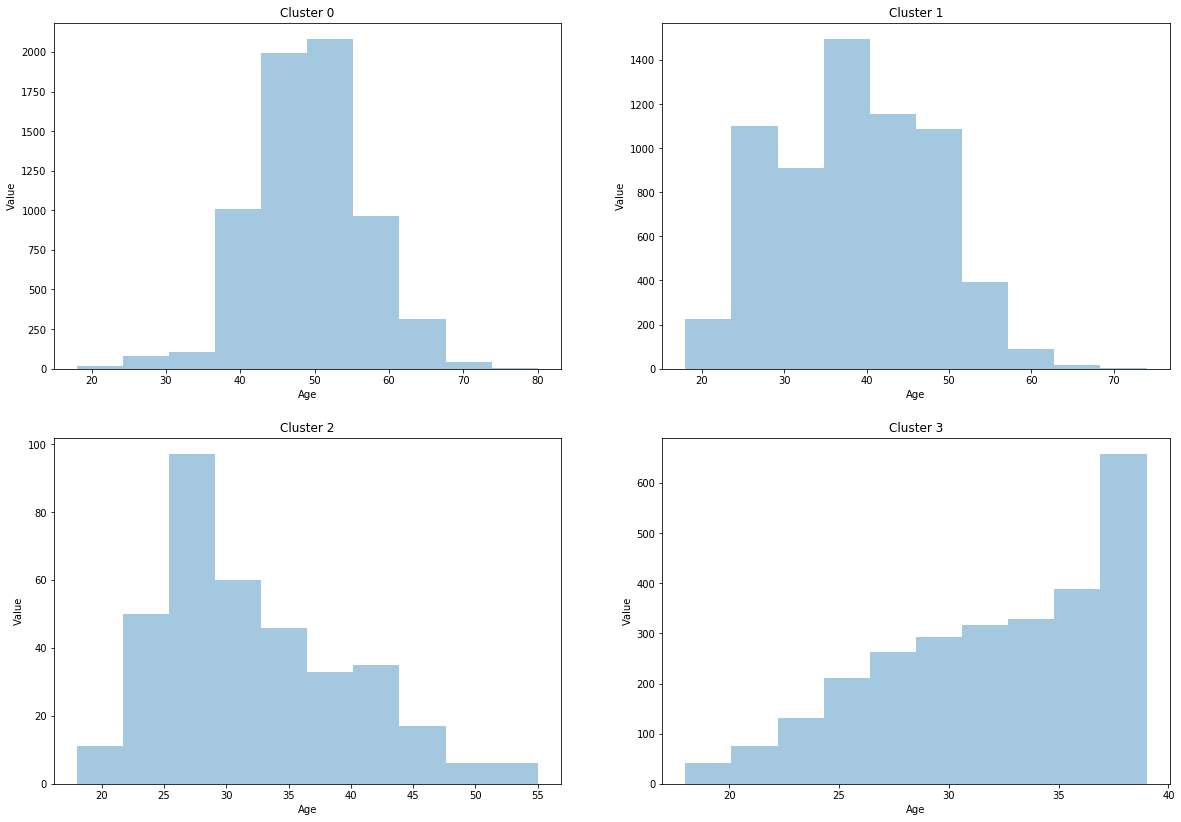

In [40]:
#setting figure size
f = plt.figure(figsize=(20,14))

#making a plot figure that will have two rows with two plots in each row
f.add_subplot(2, 2, 1)
sns.distplot(dfX_cluster0['age'], bins=10, kde=False)
plt.title("Cluster 0")
plt.ylabel('Value')
plt.xlabel('Age')

f.add_subplot(2, 2, 2)
sns.distplot(dfX_cluster1['age'], bins=10, kde=False)
plt.title('Cluster 1')
plt.ylabel('Value')
plt.xlabel('Age')


f.add_subplot(2, 2, 3)
sns.distplot(dfX_cluster2['age'], bins=10, kde=False)
plt.title("Cluster 2")
plt.ylabel('Value')
plt.xlabel('Age')

f.add_subplot(2, 2, 4)
sns.distplot(dfX_cluster3['age'], bins=10, kde=False)
plt.title('Cluster 3')
plt.ylabel('Value')
plt.xlabel('Age')

In [41]:
#getting the average of all numeric variables by grouping the data by the output variable
X.groupby('ClusterNum').mean()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
ClusterNum,,,,,,,,,,,,,,,
0,118.397661,49.178285,838.651595,46.729385,1.000000,99.335087,210.277464,8663.079087,8.028246,144.049701,23.404287,6246.705731,94.137091,170.938119,198.309170
1,125.620917,38.518764,1209.260541,49.643219,0.000000,105.430343,219.768854,10982.927104,8.390218,152.518541,24.891266,3403.842625,99.929455,180.300732,207.819084
2,85.355817,32.254848,90.058172,33.786953,0.975069,71.858338,147.992382,148.653740,5.652105,103.303435,16.870388,136.260388,68.163629,121.685540,139.760471
3,104.466953,31.965657,1620.206795,41.540956,1.000000,87.887482,183.444878,2878.618168,7.004575,126.538748,20.850620,2563.538035,83.324372,149.502482,173.095775


In [ ]:
#dfX_cluster0['25K'] = pd.to_datetime(dfX_cluster0['25k'], errors='coerce')

In [ ]:
dfX_cluster0.head()